In [1]:
# Import necessary libraries
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Read the stock data from CSV
df = pd.read_csv('/content/drive/MyDrive/stock_data.csv')

# Create a lagged column for target variable
df['y'] = df['X'].shift(-10)

# Remove rows with missing values
df = df.dropna()

Mounted at /content/drive


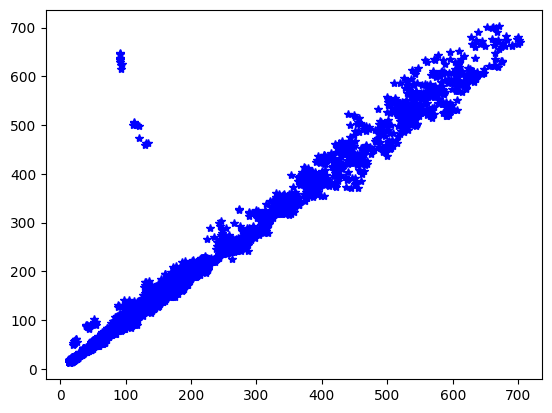

In [3]:
# Extract features and target variable
x = df['X']
y = df['y']

# Plot the stock data
fig, ax = plt.subplots()
ax.plot(x, y, 'b*')
plt.savefig('stock.png', bbox_inches='tight', dpi=300)

<ipython-input-4-0c9293676d40>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['X'])


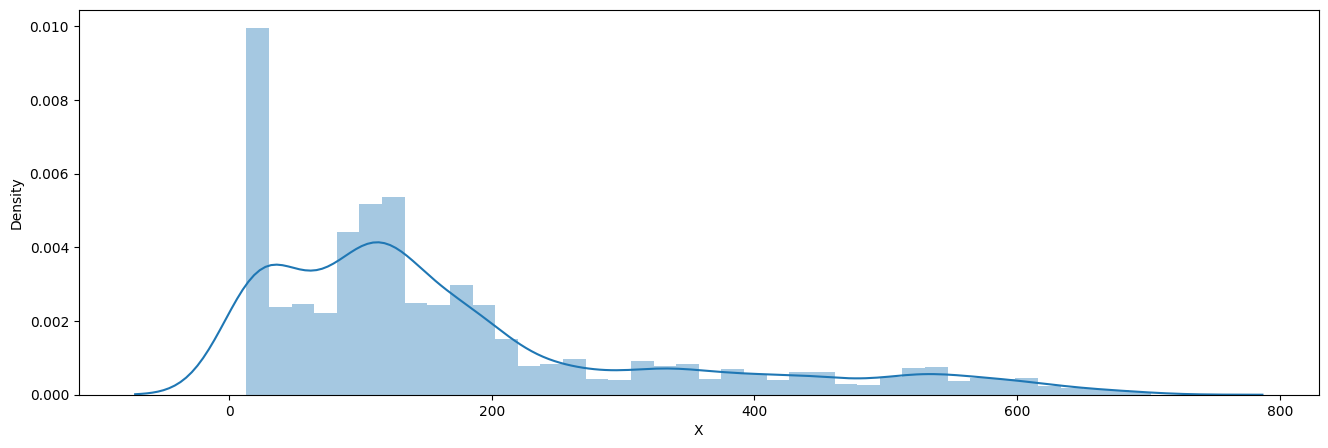

In [4]:
# Plot the distribution of x
plt.figure(figsize=(16, 5))
sns.distplot(df['X'])
plt.show()

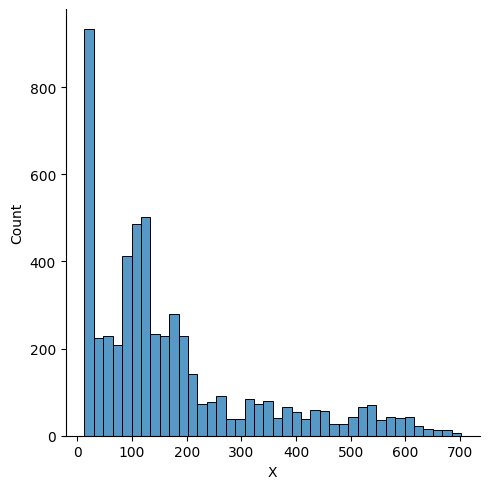

In [5]:
sns.displot(df['X'])
plt.show()

In [6]:
# Add constant term to x
x2 = sm.add_constant(x)

# Perform Ordinary Least Squares (OLS) regression
mod_OLS = sm.OLS(y, x2)
mod_OLS_trained = mod_OLS.fit()
print(mod_OLS_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.326e+05
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        07:37:20   Log-Likelihood:                -26472.
No. Observations:                5444   AIC:                         5.295e+04
Df Residuals:                    5442   BIC:                         5.296e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3527      0.634      5.289      0.0

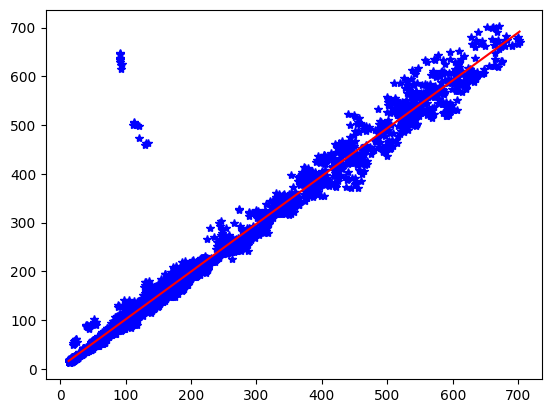

In [7]:
# Calculate residuals
ols_err = mod_OLS_trained.resid
ols_err_std = np.std(ols_err)

# Plot the regression line
fig, ax = plt.subplots()
ax.plot(x, y, 'b*')
xx = np.linspace(np.min(x), np.max(x), 100)
yy = mod_OLS_trained.params[1] * xx + mod_OLS_trained.params.const
ax.plot(xx, yy, 'r-')

<ipython-input-8-483298de45a5>:11: RuntimeWarning: divide by zero encountered in log
  L = np.sum(np.log(norm.pdf(y - y_exp, loc=0, scale=sigma + 1e-8)))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


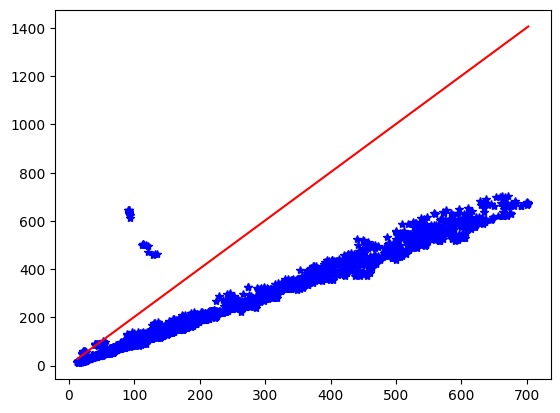

In [8]:

# Define the likelihood function
from scipy.stats import norm

def lik(parameters, x, y):
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    
    y_exp = m * x + b
        
    L = np.sum(np.log(norm.pdf(y - y_exp, loc=0, scale=sigma + 1e-8)))
    return -L

# Define constraint function
def constraints(parameters):
    sigma = parameters[2]
    return sigma
# Set up constraints
cons = {
    'type': 'ineq',
    'fun': constraints
}
# Minimize negative log-likelihood function
lik_model = minimize(lik, np.array([2, 2, 2]), args=(x, y,), constraints=cons)
# Plot the regression line using maximum likelihood estimation
fig, ax = plt.subplots()
ax.plot(x, y, 'b*')
xx = np.linspace(np.min(x), np.max(x), 100)
yy = lik_model.x[0] * xx + lik_model.x[1]
ax.plot(xx, yy, 'r-')
plt.show()